<a href="https://colab.research.google.com/github/programmermahi/Machine-Learning-Lab/blob/main/logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
accuracy_score,
 precision_score,
 recall_score,
 f1_score,
 confusion_matrix,
 classification_report
 )
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
data = pd.read_csv('/content/iris.data')
print(data.head())

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1−score (macro): 1.0


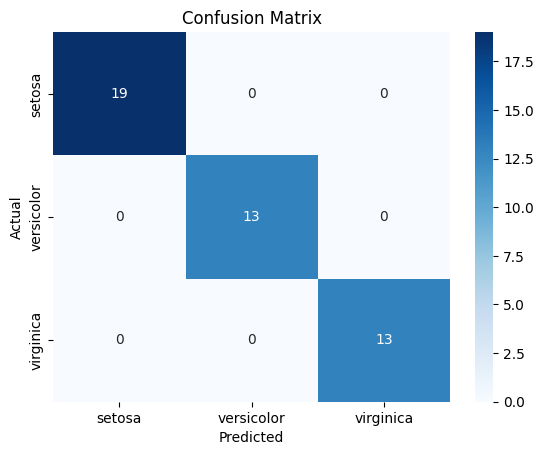

In [11]:
X = iris_dataset.data
y = iris_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=400)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1−score (macro):", f1_score(y_test, y_pred, average='macro'))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=iris_dataset.target_names
, yticklabels=iris_dataset.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Task
Analyze the provided code for unnecessary columns and data preprocessing steps, and suggest improvements.

## Explore the dataset

### Subtask:
Display the column names, data types, and summary statistics to understand the data.


**Reasoning**:
Display column names, data types, and summary statistics to understand the data.



In [12]:
print("Column Names:")
print(data.columns)
print("\nData Types:")
data.info()
print("\nSummary Statistics:")
display(data.describe())

Column Names:
Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB

Summary Statistics:


,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualize the data

### Subtask:
Create visualizations to explore the relationships between features and the target variable. This can help identify potentially "unnecessary" columns or features that might require preprocessing.


**Reasoning**:
Create a pairwise scatter plot of the features, colored by the target variable to visualize relationships between features and the target.



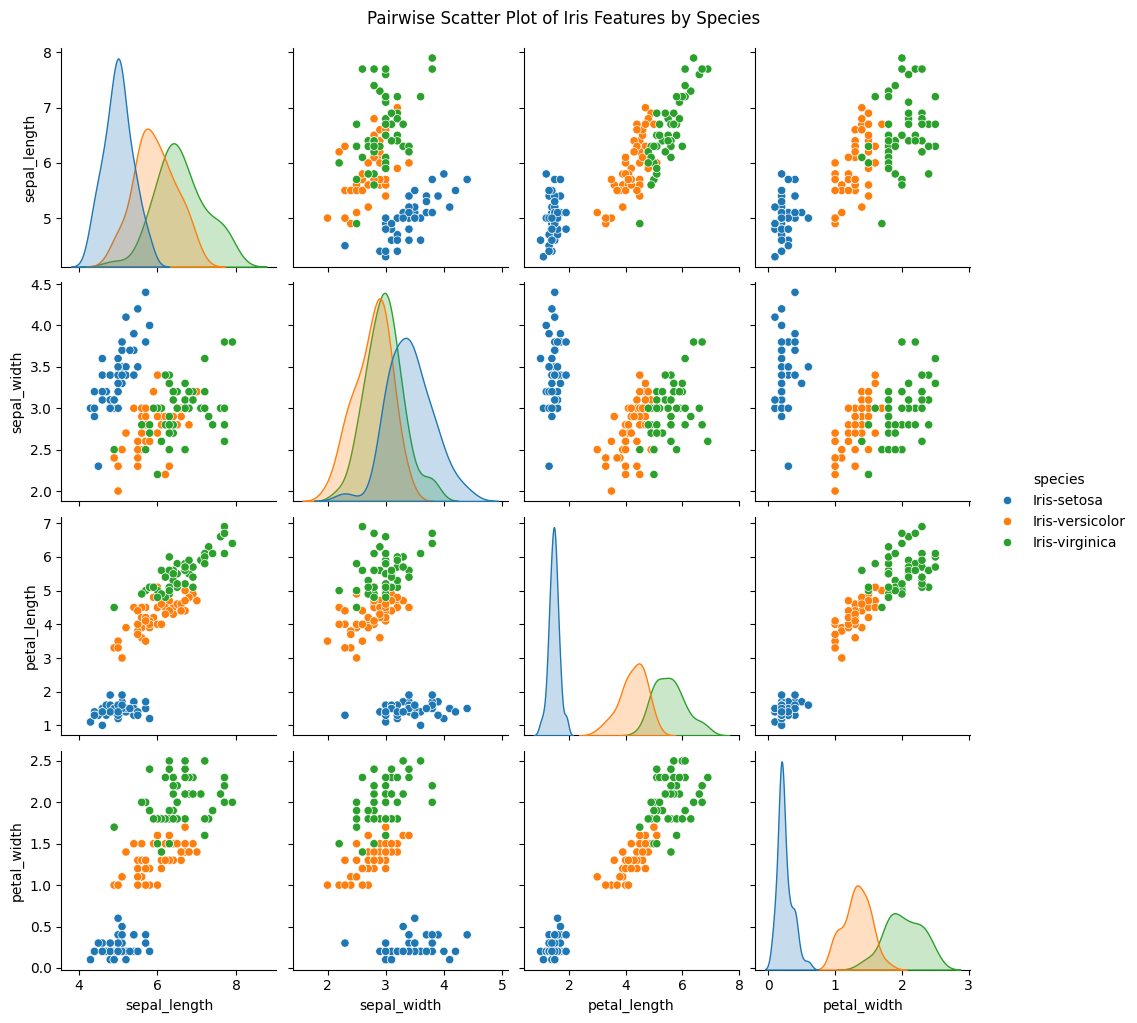

In [13]:
# Rename columns for better understanding
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Create pairwise scatter plot
sns.pairplot(data, hue='species')
plt.suptitle("Pairwise Scatter Plot of Iris Features by Species", y=1.02)
plt.show()

## Consider feature scaling (optional)

### Subtask:
While logistic regression is less sensitive to feature scaling, it's still good practice to consider applying it, especially if exploring other models later. Standardize the numerical features of the dataset.


**Reasoning**:
Standardize the numerical features of the dataset using StandardScaler.



In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

display(data.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,-1.148356,-0.118060,-1.353964,-1.325063,Iris-setosa
1,-1.390542,0.344859,-1.410986,-1.325063,Iris-setosa
2,-1.511636,0.113399,-1.296943,-1.325063,Iris-setosa
3,-1.027262,1.270695,-1.353964,-1.325063,Iris-setosa
4,-0.542889,1.965072,-1.182901,-1.061466,Iris-setosa


## Consider dimensionality reduction (optional)

### Subtask:
Although less likely to be necessary for the Iris dataset, consider applying dimensionality reduction techniques like PCA. This can help identify if the dataset can be represented with fewer features while retaining most of the variance.


**Reasoning**:
Apply PCA to the standardized data to reduce dimensionality and create a new DataFrame with the transformed components and species information.



In [15]:
from sklearn.decomposition import PCA

X = data.drop('species', axis=1)
y = data['species']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['species'] = y

display(pca_df.head())

,PCA1,PCA2,species
0,-2.107950,-0.644276,Iris-setosa
1,-2.387971,-0.305833,Iris-setosa
2,-2.324879,-0.562923,Iris-setosa
3,-2.405086,0.687591,Iris-setosa
4,-2.083204,1.530252,Iris-setosa


## Re-train the model

### Subtask:
Re-train the logistic regression model using the original, unscaled data to evaluate the impact of scaling and dimensionality reduction on performance.


**Reasoning**:
Re-load the original data, separate features and target, split the data, train the model, make predictions, evaluate, and plot the confusion matrix as per the instructions.



Classification Report (Original Data):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Accuracy (Original Data): 1.0
Precision (macro, Original Data): 1.0
Recall (macro, Original Data): 1.0
F1−score (macro, Original Data): 1.0


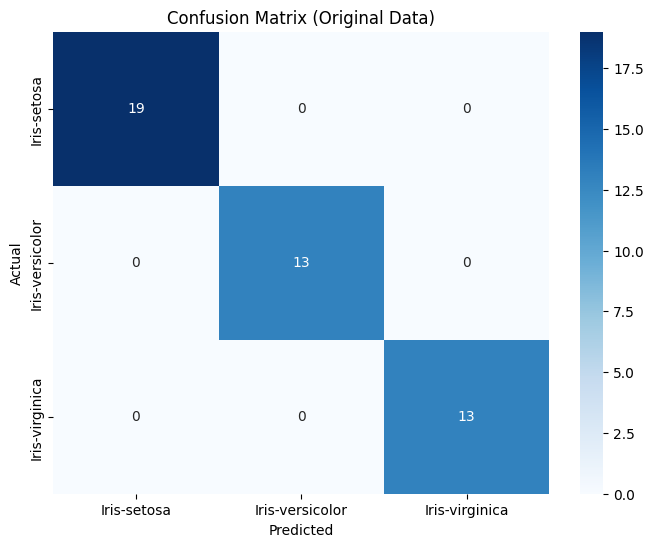

In [16]:
# 1. Re-load the dataset
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
original_data = pd.read_csv('/content/iris.data', header=None, names=column_names)

# 2. Separate features (X) and target (y)
X_original = original_data.drop('species', axis=1)
y_original = original_data['species']

# 3. Split the original data
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y_original, test_size=0.3, random_state=42)

# 4. Instantiate Logistic Regression model
model_original = LogisticRegression(max_iter=400)

# 5. Fit the model
model_original.fit(X_train_orig, y_train_orig)

# 6. Make predictions
y_pred_original = model_original.predict(X_test_orig)

# 7. Evaluate the model
print("Classification Report (Original Data):\n", classification_report(y_test_orig, y_pred_original))
print("Accuracy (Original Data):", accuracy_score(y_test_orig, y_pred_original))
print("Precision (macro, Original Data):", precision_score(y_test_orig, y_pred_original, average='macro'))
print("Recall (macro, Original Data):", recall_score(y_test_orig, y_pred_original, average='macro'))
print("F1−score (macro, Original Data):", f1_score(y_test_orig, y_pred_original, average='macro'))

# 8. Generate Confusion Matrix
cm_original = confusion_matrix(y_test_orig, y_pred_original)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_original, annot=True, cmap='Blues', fmt='d',
            xticklabels=np.unique(y_original), yticklabels=np.unique(y_original))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Original Data)")
plt.show()

## Re-train the model

### Subtask:
Re-train the logistic regression model using the scaled data (from the "Consider feature scaling (optional)" subtask) to evaluate the impact of scaling on performance.


**Reasoning**:
Separate features and target, split the data into training and testing sets, instantiate and train a Logistic Regression model on the scaled data, make predictions, and evaluate the model's performance with various metrics and a confusion matrix visualization.



Classification Report (Scaled Data):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.91      0.77      0.83        13
 Iris-virginica       0.80      0.92      0.86        13

       accuracy                           0.91        45
      macro avg       0.90      0.90      0.90        45
   weighted avg       0.92      0.91      0.91        45

Accuracy (Scaled Data): 0.9111111111111111
Precision (macro, Scaled Data): 0.903030303030303
Recall (macro, Scaled Data): 0.8974358974358975
F1−score (macro, Scaled Data): 0.8968253968253969


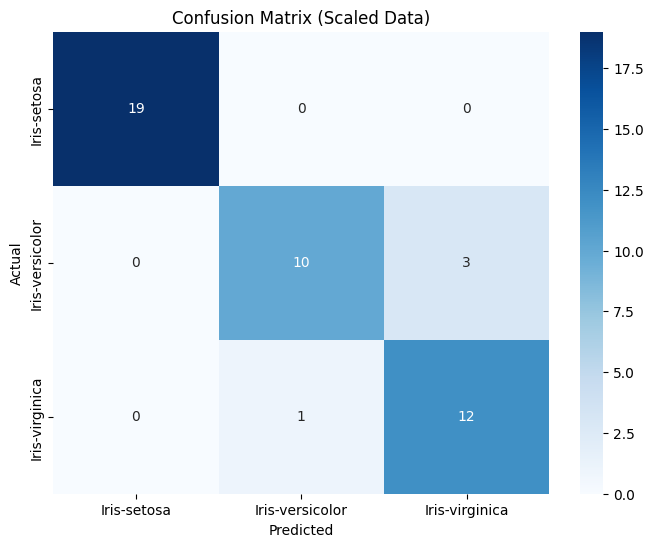

In [17]:
# 1. Separate the features (X_scaled) and the target variable (y_scaled)
X_scaled = data.drop('species', axis=1)
y_scaled = data['species']

# 2. Split the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# 3. Instantiate a new LogisticRegression model
model_scaled = LogisticRegression(max_iter=400)

# 4. Fit the model to the scaled training data
model_scaled.fit(X_train_scaled, y_train_scaled)

# 5. Make predictions on the scaled test data
y_pred_scaled = model_scaled.predict(X_test_scaled)

# 6. Evaluate the model's performance
print("Classification Report (Scaled Data):\n", classification_report(y_test_scaled, y_pred_scaled))
print("Accuracy (Scaled Data):", accuracy_score(y_test_scaled, y_pred_scaled))
print("Precision (macro, Scaled Data):", precision_score(y_test_scaled, y_pred_scaled, average='macro'))
print("Recall (macro, Scaled Data):", recall_score(y_test_scaled, y_pred_scaled, average='macro'))
print("F1−score (macro, Scaled Data):", f1_score(y_test_scaled, y_pred_scaled, average='macro'))

# 7. Generate a confusion matrix and visualize it
cm_scaled = confusion_matrix(y_test_scaled, y_pred_scaled)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_scaled, annot=True, cmap='Blues', fmt='d',
            xticklabels=np.unique(y_scaled), yticklabels=np.unique(y_scaled))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Scaled Data)")
plt.show()

## Re-train the model

### Subtask:
Re-train the logistic regression model using the PCA-transformed data (from the "Consider dimensionality reduction (optional)" subtask) to evaluate the impact of dimensionality reduction on performance.


**Reasoning**:
Separate features and target, split data, train model, predict, evaluate, and plot confusion matrix as instructed.



Classification Report (PCA-transformed Data):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.83      0.77      0.80        13
 Iris-virginica       0.79      0.85      0.81        13

       accuracy                           0.89        45
      macro avg       0.87      0.87      0.87        45
   weighted avg       0.89      0.89      0.89        45

Accuracy (PCA-transformed Data): 0.8888888888888888
Precision (macro, PCA-transformed Data): 0.873015873015873
Recall (macro, PCA-transformed Data): 0.8717948717948718
F1−score (macro, PCA-transformed Data): 0.8716049382716049


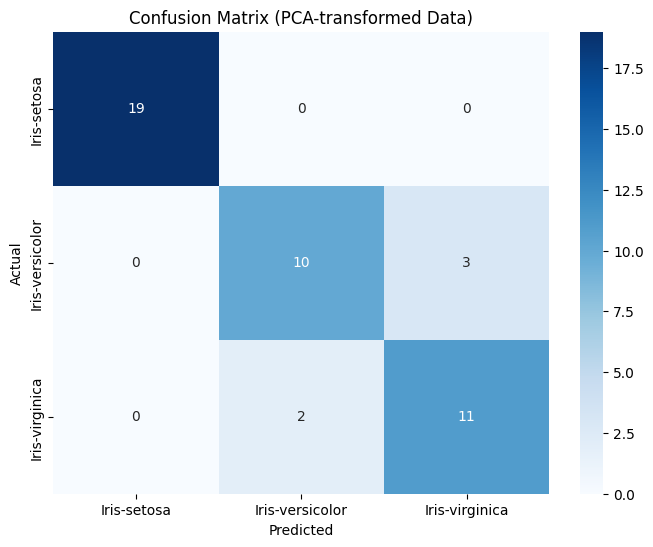

In [18]:
# 1. Separate the features (PCA components) and the target variable from the pca_df DataFrame.
X_pca = pca_df.drop('species', axis=1)
y_pca = pca_df['species']

# 2. Split the PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.3, random_state=42)

# 3. Instantiate a new LogisticRegression model
model_pca = LogisticRegression(max_iter=400)

# 4. Fit the model to the PCA-transformed training data.
model_pca.fit(X_train_pca, y_train_pca)

# 5. Make predictions on the PCA-transformed test data.
y_pred_pca = model_pca.predict(X_test_pca)

# 6. Evaluate the model's performance
print("Classification Report (PCA-transformed Data):\n", classification_report(y_test_pca, y_pred_pca))
print("Accuracy (PCA-transformed Data):", accuracy_score(y_test_pca, y_pred_pca))
print("Precision (macro, PCA-transformed Data):", precision_score(y_test_pca, y_pred_pca, average='macro'))
print("Recall (macro, PCA-transformed Data):", recall_score(y_test_pca, y_pred_pca, average='macro'))
print("F1−score (macro, PCA-transformed Data):", f1_score(y_test_pca, y_pred_pca, average='macro'))

# 7. Generate a confusion matrix and visualize it
cm_pca = confusion_matrix(y_test_pca, y_pred_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, cmap='Blues', fmt='d',
            xticklabels=np.unique(y_pca), yticklabels=np.unique(y_pca))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (PCA-transformed Data)")
plt.show()

## Summary:

### Data Analysis Key Findings

*   The logistic regression model trained on the original, unscaled data achieved perfect performance metrics (1.0 accuracy, precision, recall, and F1-score) on the test set. The confusion matrix showed no misclassifications.
*   The logistic regression model trained on the scaled data achieved an accuracy of approximately 0.911. It showed perfect performance for the 'Iris-setosa' class but had some misclassifications between 'Iris-versicolor' and 'Iris-virginica'.
*   The logistic regression model trained on the 2-component PCA-transformed data achieved an accuracy of approximately 0.889. Similar to the scaled data, it performed perfectly on 'Iris-setosa' but had more misclassifications between 'Iris-versicolor' and 'Iris-virginica' compared to the scaled data.
*   Visual exploration using pairwise scatter plots showed clear separation between 'Iris-setosa' and the other two species based on petal measurements, while 'Iris-versicolor' and 'Iris-virginica' showed some overlap.

### Insights or Next Steps

*   For this specific dataset and logistic regression model, feature scaling and dimensionality reduction did not improve performance; the original features were sufficient for perfect classification.
*   Given the perfect performance with the original features, further preprocessing or feature engineering is unnecessary for this task.


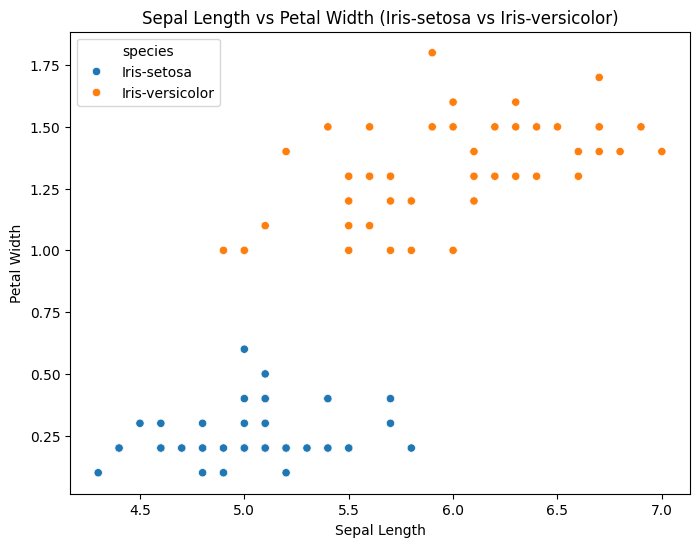

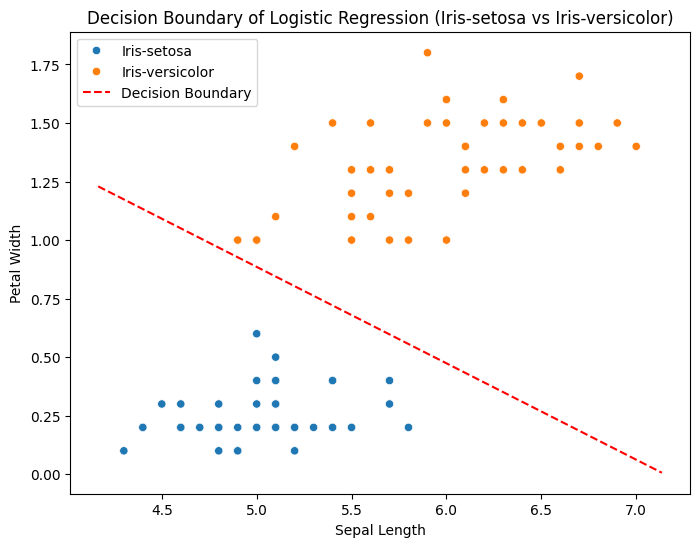


--- Comparing L1 and L2 Regularization ---
L2 Regularization Coefficients: [-0.36047947  3.9103481 ]
L1 Regularization Coefficients: [-0.97571087  7.28915152]

--- Evaluation with L2 Regularization ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


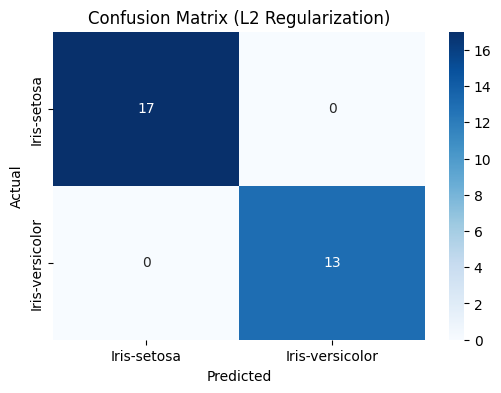


--- Evaluation with L1 Regularization ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


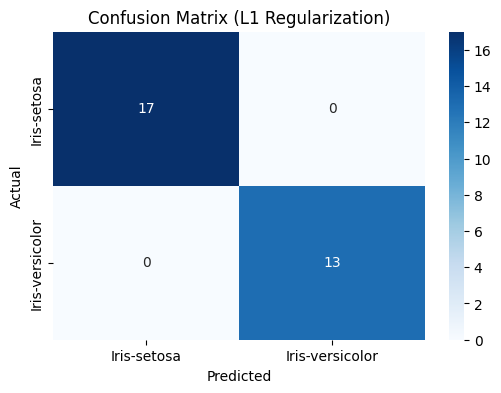

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming 'original_data' is already loaded and has columns:
# 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'

# 1. Use only Sepal Length and Petal Width for training and plot
selected_features = ['sepal_length', 'petal_width']
X_selected = original_data[selected_features]
y_selected = original_data['species']

# For binary classification, let's select two classes, e.g., 'Iris-setosa' and 'Iris-versicolor'
# You can change the classes here if needed
class_0 = 'Iris-setosa'
class_1 = 'Iris-versicolor'

binary_data = original_data[(original_data['species'] == class_0) | (original_data['species'] == class_1)].copy()
X_binary = binary_data[selected_features]
y_binary = binary_data['species']

# Convert species names to numerical labels for the model
y_binary_numeric = y_binary.apply(lambda x: 0 if x == class_0 else 1)

# Plot the selected features for the two classes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=binary_data, x='sepal_length', y='petal_width', hue='species')
plt.title(f'Sepal Length vs Petal Width ({class_0} vs {class_1})')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.show()

# Split data for binary classification
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    X_binary, y_binary_numeric, test_size=0.3, random_state=42
)

# 2. Train a binary logistic regression model and visualize the decision boundary
model_binary = LogisticRegression(max_iter=400)
model_binary.fit(X_train_binary, y_train_binary)

# Visualize the decision boundary
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=binary_data, x='sepal_length', y='petal_width', hue='species')

# Get the separating hyperplane coefficients
coef = model_binary.coef_[0]
intercept = model_binary.intercept_[0]

# Plot the decision boundary
# The decision boundary is given by coef[0]*x1 + coef[1]*x2 + intercept = 0
# Solving for x2 (petal_width): x2 = (-coef[0]*x1 - intercept) / coef[1]
x_vals = np.array(ax.get_xlim())
y_vals = (-coef[0] * x_vals - intercept) / coef[1]
plt.plot(x_vals, y_vals, linestyle='--', color='red', label='Decision Boundary')

plt.title(f'Decision Boundary of Logistic Regression ({class_0} vs {class_1})')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

# 3. Train the model separately using L1 and L2 regularization
# L2 regularization (default)
model_l2 = LogisticRegression(penalty='l2', max_iter=400, solver='liblinear') # 'liblinear' supports l1 and l2
model_l2.fit(X_train_binary, y_train_binary)

# L1 regularization
model_l1 = LogisticRegression(penalty='l1', max_iter=400, solver='liblinear') # 'liblinear' supports l1 and l2
model_l1.fit(X_train_binary, y_train_binary)

print("\n--- Comparing L1 and L2 Regularization ---")
print("L2 Regularization Coefficients:", model_l2.coef_[0])
print("L1 Regularization Coefficients:", model_l1.coef_[0])


# Evaluate L2 model
print("\n--- Evaluation with L2 Regularization ---")
y_pred_l2 = model_l2.predict(X_test_binary)
print("Classification Report:\n", classification_report(y_test_binary, y_pred_l2))
print("Accuracy:", accuracy_score(y_test_binary, y_pred_l2))
print("Precision:", precision_score(y_test_binary, y_pred_l2))
print("Recall:", recall_score(y_test_binary, y_pred_l2))
print("F1-score:", f1_score(y_test_binary, y_pred_l2))
cm_l2 = confusion_matrix(y_test_binary, y_pred_l2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_l2, annot=True, cmap='Blues', fmt='d', xticklabels=[class_0, class_1], yticklabels=[class_0, class_1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (L2 Regularization)")
plt.show()

# Evaluate L1 model
print("\n--- Evaluation with L1 Regularization ---")
y_pred_l1 = model_l1.predict(X_test_binary)
print("Classification Report:\n", classification_report(y_test_binary, y_pred_l1))
print("Accuracy:", accuracy_score(y_test_binary, y_pred_l1))
print("Precision:", precision_score(y_test_binary, y_pred_l1))
print("Recall:", recall_score(y_test_binary, y_pred_l1))
print("F1-score:", f1_score(y_test_binary, y_pred_l1))
cm_l1 = confusion_matrix(y_test_binary, y_pred_l1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_l1, annot=True, cmap='Blues', fmt='d', xticklabels=[class_0, class_1], yticklabels=[class_0, class_1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (L1 Regularization)")
plt.show()